# Part 3b: Data Visualization

During the exploratory phase of a data science project, it's important to understand the data that you're working with. Data visualization is an effective way to detect patterns, trends, and outliers in complex data.

There are several tools that you can use for data visualization in Python:

- [Matplotlib](https://matplotlib.org/)
- [Seaborn](https://seaborn.pydata.org/)
- [Altair](https://altair-viz.github.io/)
- [Bokeh](https://docs.bokeh.org/en/latest/index.html)
- [Plotly](https://plot.ly/)

[Matplotlib](https://matplotlib.org/) is one of the original plotting packages in Python and is based off of MATLAB. It was built before Pandas existed, so building plots from dataframes in Matplotlib can be quite complicated. 


[Seaborn](https://seaborn.pydata.org/) is another plotting library that is built off of Matplotlib, and provides an easy-to-use interface to build visualizations from dataframes. In this tutorial, we'll be looking at the plotting techniques offered by Seaborn.

### Importing Dependencies

In this tutorial, we'll be using the following packages:

- pandas
- seaborn
- matplotlib 

Seaborn is built off of Matplotlib so we'll need to import Matplotlib if we want to make small tweaks to our plots.

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Data

We're going to be using the Starbucks drink dataset. It contains nutritional facts of beverage items from the Starbucks menu. 

In [18]:
starbucks_drink = pd.read_csv("data/starbucks_drink_menu.csv")
starbucks_drink.head()

,beverage,beverage_category,drink_size,milk_type,calories,caffeine_in_mg,carbs_in_g,sugars_in_g,protein_in_g,fat_in_g,fibre_in_g,cholesterol_in_mg,saturated_fat_in_g,sodium_in_mg,trans_fat_in_g,vit_a_dv,vit_c_dv,iron_dv,calcium_dv
0,Brewed Coffee,Coffee,Short,NaN,3,175,5,0,0.3,0.1,0,0,0.0,0,0.0,0%,0%,0%,0%
1,Brewed Coffee,Coffee,Tall,NaN,4,260,10,0,0.5,0.1,0,0,0.0,0,0.0,0%,0%,0%,0%
2,Brewed Coffee,Coffee,Grande,NaN,5,330,10,0,1.0,0.1,0,0,0.0,0,0.0,0%,0%,0%,0%
3,Brewed Coffee,Coffee,Venti,NaN,5,410,10,0,1.0,0.1,0,0,0.0,0,0.0,0%,0%,0%,2%
4,Caffè Americano,Classic Espresso Drinks,Short,NaN,5,75,5,0,0.4,0.0,0,1,0.0,0,0.0,0%,0%,0%,0%


### Distplot: Histogram for Continuous Variables

Let's create a histogram plot to represent the distribution of calories in our dataset. We can use Seaborn's [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to do this. 

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


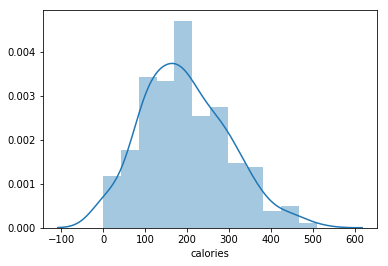

In [19]:
sns.distplot(starbucks_drink['calories'])

By default, Seaborn also plots the [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) of the data, which is represents by the smooth line in the plot. You can plot this line on its own using Seaborn's [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) function. 

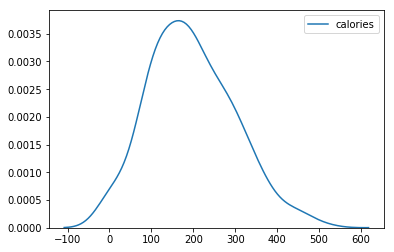

In [20]:
sns.kdeplot(starbucks_drink['calories'])

Let's say we wanted to plot the mean on top of this. Unfortuantely, there is no built-in function to do this with Seaborn, but we can superimpose a line representing the mean value using Matplotlib's [axvline](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axvline.html). This function creates a vertical line. You can play around with the linestyle, linewidth, and color. Check out Matplotlib's [documentation](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axvline.html) for more information.

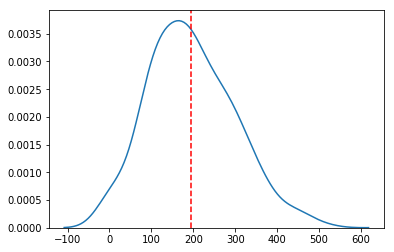

In [21]:
sns.kdeplot(starbucks_drink['calories'], legend=False)
plt.axvline(starbucks_drink['calories'].mean(), linestyle='--', color='red')

### Countplot: Histogram for Categorical Variables

In our Starbucks drink dataset, we have a few categorical variables. Let's create a histogram for one of the categorical variables, `beverage_category`. This will give us an idea of how many drinks exist for each beverage category. We'll use Seaborn's [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) to do this.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

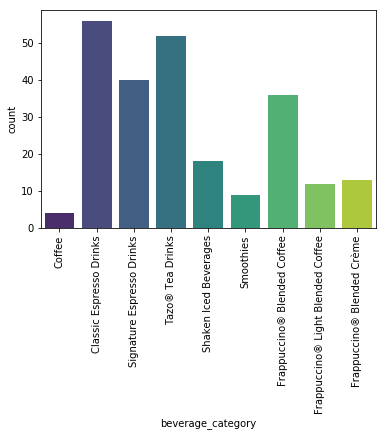

In [23]:
sns.countplot(starbucks_drink['beverage_category'], palette='viridis')
plt.xticks(rotation=90)

In the plot above, we can see that "Classic Espresso Drinks" is the most common beverage category in our Starbucks drink menu. The least common beverage category is "Coffee". 

We added this line:

```
plt.xticks(rotation=90)
```

after our countplot plot to rotate the labels of our x-axis by 90 degrees. You can play around with this parameter and see how it looks. Without rotating the labels, there would be overlap in the label names which would make it hard to read. 

We also specified the `palette` to be "viridis". Seaborn offers a wide selection of color palettes that you can test out. There is an entire page dedicated to palette documentation [here](https://seaborn.pydata.org/tutorial/color_palettes.html). Feel free to try different palettes (e.g., "husl", "magma", and "Blues").

If we wanted to arrange the countplot from most frequent to least frequent beverage category, we can specify this with the `order` parameter. Here, we'll use Pandas' [value_counts()]()'s index to get the `beverage_category`'s in descending order.  

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

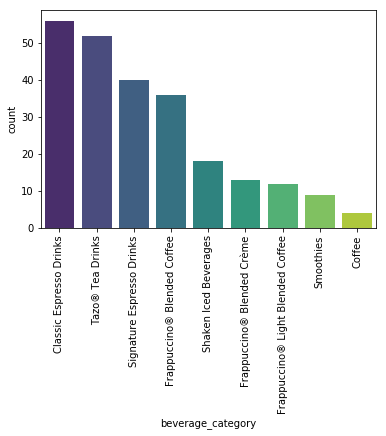

In [25]:
sns.countplot(starbucks_drink['beverage_category'], 
              order=starbucks_drink['beverage_category'].value_counts().index, 
              palette='viridis')
plt.xticks(rotation=90)

### Pairplots

We can generate joint plots for continuous variables in our dataset. This is useful for exploring trends and correlations between features in a multidimensional dataset. A pairplot works by plotting all pairs of values against each other. Let's create a pairplot for 4 continuous variables in our dataset:

- calories
- fat_in_g
- carbs_in_g
- protein_in_g

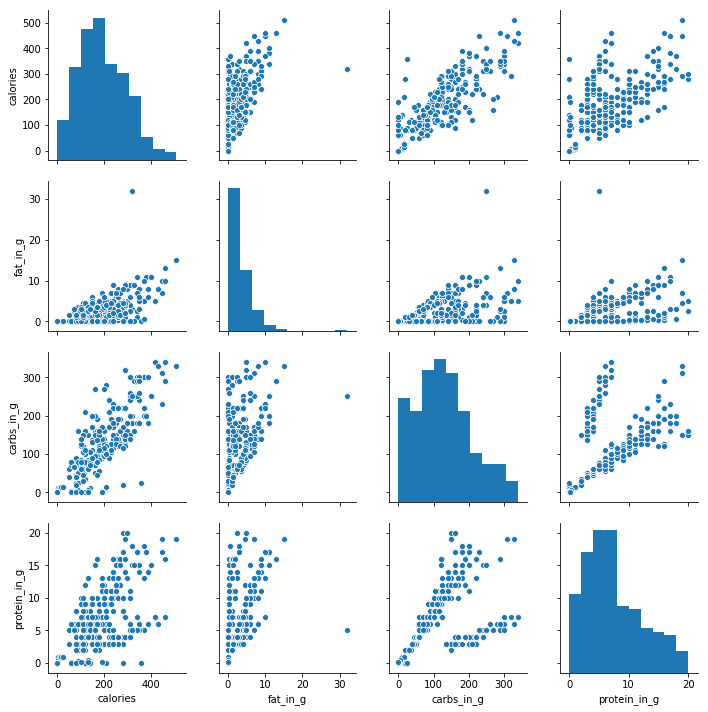

In [34]:
variables = ['calories', 'fat_in_g', 'carbs_in_g', 'protein_in_g']
sns.pairplot(starbucks_drink[variables])

### Jointplot

Similar to the pairplot, we can use Seaborn's [jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to show the joint distribution between two features within a dataset. The histograms on the x and y axes represent the associated marginal distributions. To create the jointplot, you can choose which feature (column name) you want on the x-axis and y-axis. You also need to specify the dataframe that you're referencing with the `data` parameter. The `kind` parameter lets you decide what kind of plot you want to draw. You can choose from "scatter", "reg", "resid", "kde", or "hex".

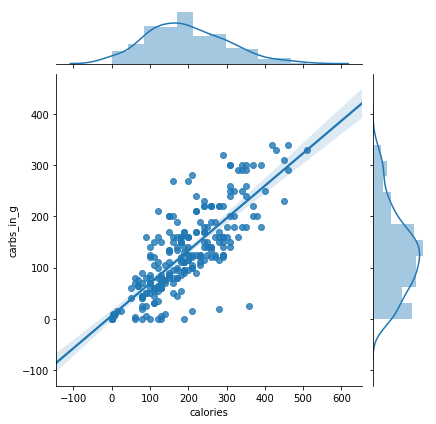

In [38]:
sns.jointplot(x="calories", y="carbs_in_g", data=starbucks_drink, kind="reg")

### Barplots

If you want to plot a continuous variable against a categorical/discrete variable, Seaborn's [barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html) is a good choice. Similar to the jointplot, you need to specify which variables you want for the x and y axes. The traditional setup is to have the categorical variable as the x-axis and continuous variable as the y-axis. You can add a title to your plot using Matplotlib's [title](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html) function. 

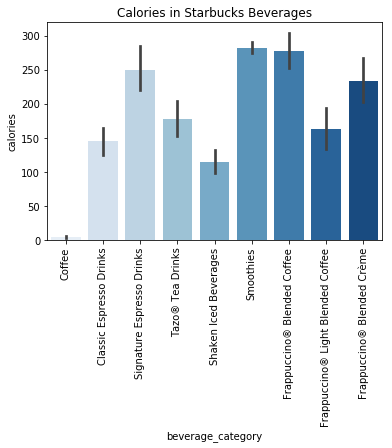

In [57]:
sns.barplot(x='beverage_category', y='calories', data=starbucks_drink, palette='Blues')
plt.xticks(rotation=90)
plt.title('Calories in Starbucks Beverages')
plt.show()

### Categorical Scatterplots

If we wanted to better visualize the distribution of calories within each `beverage_category`, we could use Seaborn's [swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot). With swarmplot, the data points are "jittered" so that they don't overlap. This gives us a better visualization of the distribution of values. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

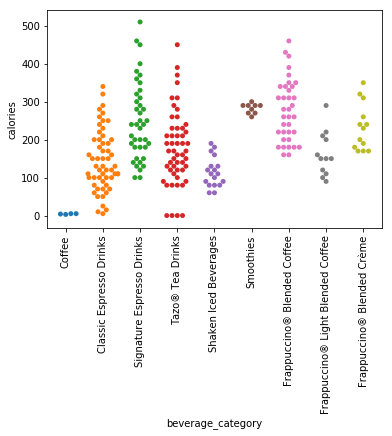

In [59]:
sns.swarmplot(y='calories', x='beverage_category', data=starbucks_drink)
plt.xticks(rotation=90)

In the swarmplot above, we can see that the amount of calories is fairly consistent in the "Coffee" beverage category, while "Tazo Tea Drinks" has more variation in calories amount.

We can also look at the distribution of values using Seaborn's [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function. We'll need to change `sns.swarmplot` to `sns.boxplot`. This time, let's try looking at `carbs_in_g` against `beverage_category`.

Text(0, 0.5, 'carbs (g)')

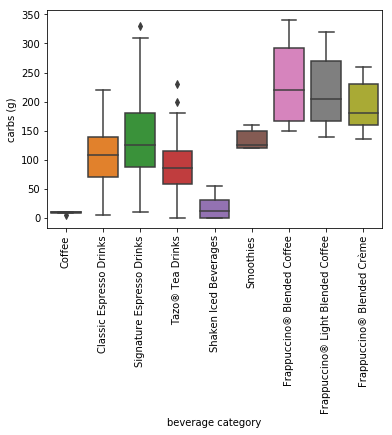

In [60]:
sns.boxplot(y='carbs_in_g', x='beverage_category', data=starbucks_drink)
plt.xticks(rotation=90)
plt.xlabel("beverage category")
plt.ylabel("carbs (g)")

In the plot above, we can see that "Frappucino Blended Coffees" are the most carb-heavy drinks in our dataset. 

Notice that we renamed the x-axis and y-axis labels to remove the `_` underscores using [plt.xlabel()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html) and [plt.ylabel()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylabel.html). 

This tutorial covered the core plotting functions of Seaborn. It's a good start for doing your own data explorations. To learn more about what else Seaborn offers, check out the official documentation [here](https://seaborn.pydata.org/index.html). 